In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Summary Statistics

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations :-
    
1. The mean is less than median for all columns.
2. There is large difference between 75 % and maximum for fare and Passenger Id column.

# Exploring Target Variable

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

As target variable has only 2 values, so , this is a classification problem.

# Data Visualizations

To check missing values

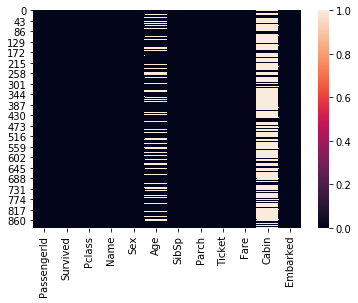

In [9]:
sns.heatmap(df.isnull())

Obsevations :-
    
1. The data has missing values.

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing Values

In [11]:
df['Cabin'].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [12]:
df['Cabin'].mode()[0]

'B96 B98'

In [13]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [14]:
df['Embarked'].unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [15]:
df['Embarked'].mode()[0]

'S'

In [16]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
df['Age'].mean()

29.69911764705882

In [18]:
df['Age'].median()

28.0

In [19]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [20]:
df['Age'].isnull().sum()

0

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Univariate Analysis

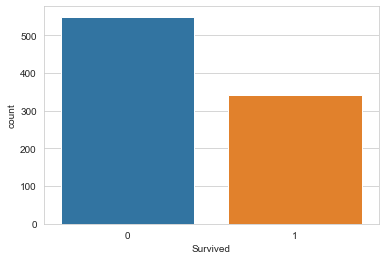

In [22]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'])

Observations :-
    
1. Passengers have sinked more than survived.

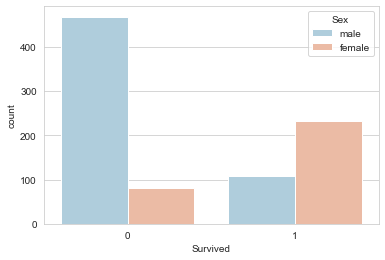

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

Observations:-
    
1. Females have survived more than males.

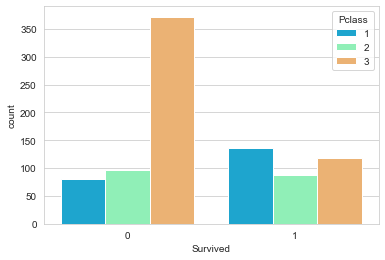

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

Observations :-
    
1. Maximum number of passengers have survived in Passenger Class 1.
2. Minimum number of passenger have survived in Passenger Class 3.

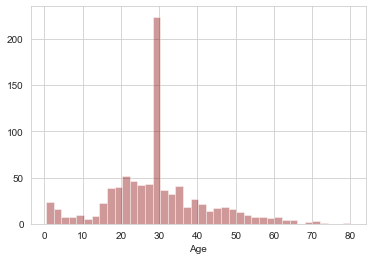

In [25]:
sns.distplot(df['Age'],kde=False,color='darkred',bins=40)

Observations :-
    
1. Maximum number of passenger have survived between the age of 20 to 40.
2. Least number of passenger have survived between the age of 60 to 90.


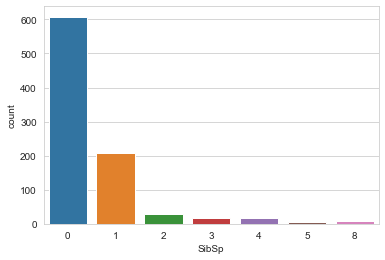

In [26]:
sns.countplot(x='SibSp',data=df)

Observations :-
    
1. 600 number of passenger have neither sibling nor spouse with them.
2. 5 number of passenger have 5 sibling or spouse with them.

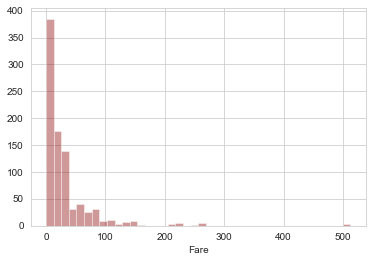

In [27]:
sns.distplot(df['Fare'],kde=False,color='darkred',bins=40)

Observations :-
    
1. Maximum number of passengers have paid fare between 0 to 100.
2. Few passengers have paid fare between 200 to 300.
3. No passenger has paid fare more than 300.

In [28]:
dfcorr=df.corr()
dfcorr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


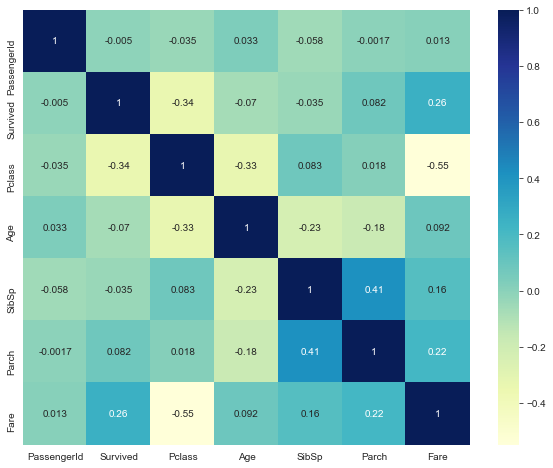

In [29]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

Observations :-
   
1. Survived is highly positively correlated with Fare.
2. Fare is highly negatively correlated with PClass.
3. PClass is highly positively correlated with Embarked.
4. PClass is highly negatively correlated with Survived.

# Bivariate Analysis

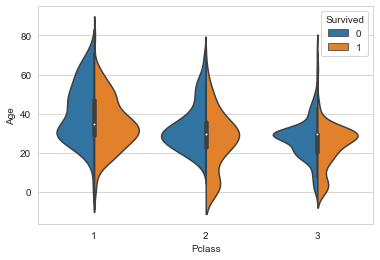

In [30]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df,split=True)

Observations :-
    
1. For the age range of 20-40, In class 1, Passengers have survived more than died.
2. For the age range of 20-40, In class 2, Passengers have died more than survived.
3. For the age range of 20-40, In class 3, Passengers have died more than survived.
4. For the age range of 0-20, In class 1, Passengers have survived more than died.
5. For the age range of 0-20, In class 2, Passengers have survived more than died.
6. For the age range of 0-20, In class 3, Passengers have survived more than died.
7. For the age range of 40-60, In class 1, Passengers have died more than survived.
8. For the age range of 40-60, In class 2, Passengers have died more than survived.
9. For the age range of 40-60, In class 3, Passengers have died more than survived.

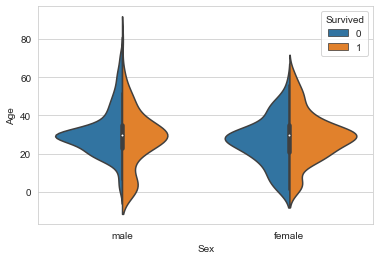

In [31]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

Observations :-

1. For the age range of 20-40, In male category, Passengers have died more than survived.
2. For the age range of 20-40, In female category, Passengers have survived more than died.
3. For the age range of 0-20, In male category, Passengers have survived more than died.
4. For the age range of 0-20, In female category, Passengers have died more than survived.
5. For the age range of 40-60, In male category, Passengers have survived more than died.
6. For the age range of 40-60, In female category, Passengers have died more than survived.

# Plotting Outliers

PassengerId       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Survived       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Pclass         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Age            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
SibSp             AxesSubplot(0.125,0.391471;0.168478x0.222059)
Parch          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Fare           AxesSubplot(0.529348,0.391471;0.168478x0.222059)
dtype: object

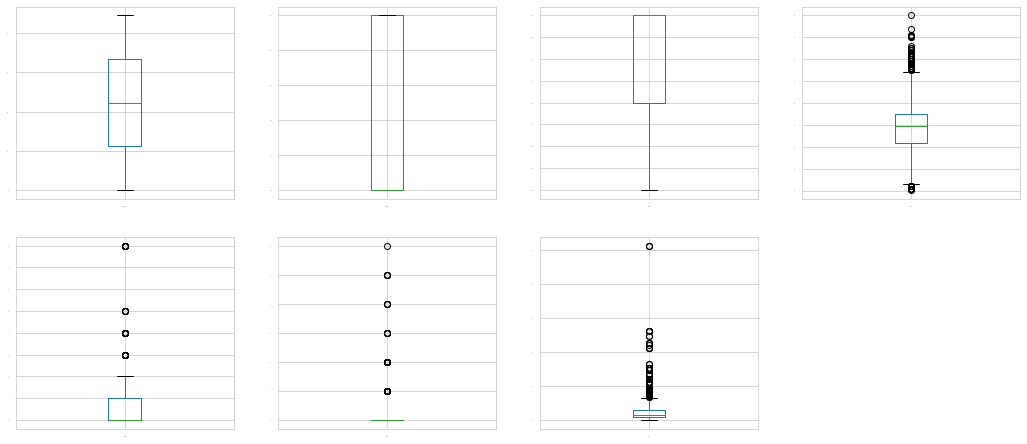

In [32]:
df.plot(kind='box',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Age, SibSp, Parch, Fare and Embarked have outliers.

# Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])

In [34]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [35]:
df['Cabin']=LE.fit_transform(df['Cabin'])

In [36]:
df['Cabin'].value_counts()

47     691
145      4
63       4
141      3
62       3
      ... 
95       1
97       1
99       1
100      1
0        1
Name: Cabin, Length: 147, dtype: int64

In [37]:
df['Embarked']=LE.fit_transform(df['Embarked'])

In [38]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

# Dropping of Columns

In [39]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Removing Outliers

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [42]:
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [43]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
df_new.shape

(820, 9)

In [46]:
df.shape

(891, 9)

In [47]:
df=df_new

In [48]:
# 105 rows are removed as outliers

In [49]:
df.shape

(820, 9)

# To check Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142AEE39748>,
      dtype=object)

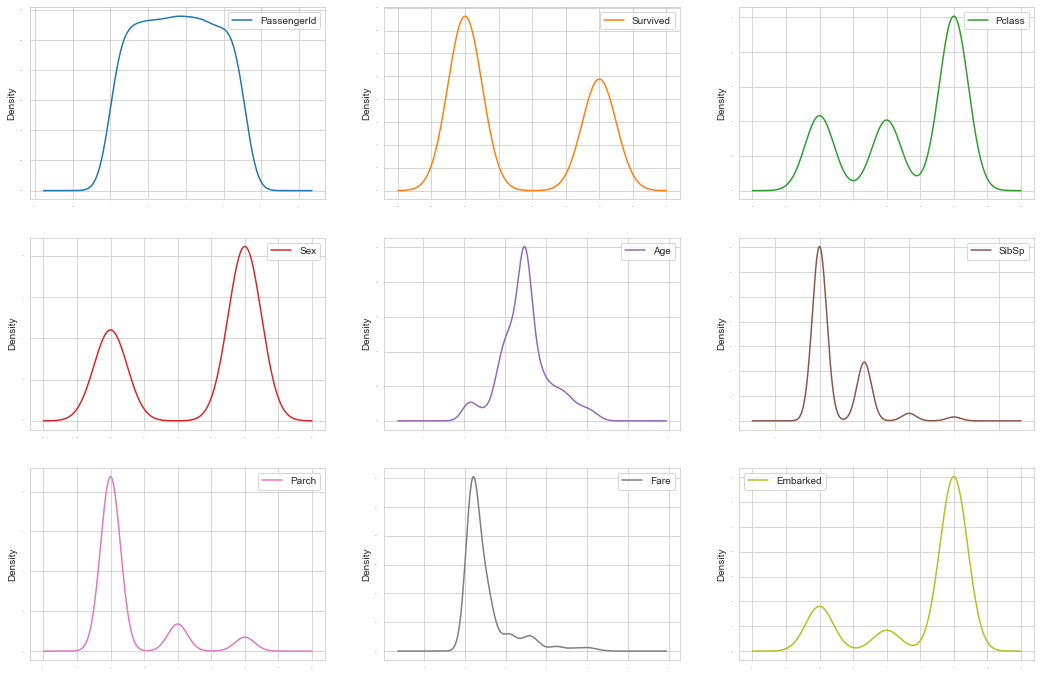

In [50]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. SibSp, Parch and Fare are right skewed.
2. Sex, Embarked and Pclass are left skewed.

In [51]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

In [52]:
list=['SibSp',
       'Parch', 'Fare']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [53]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.136758
Parch          1.723351
Fare           1.350428
Embarked      -1.277386
dtype: float64

In [54]:
list=['SibSp',
       'Parch']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [55]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          0.983568
Parch          1.615593
Fare           1.350428
Embarked      -1.277386
dtype: float64

In [56]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [57]:
list=['SibSp',
       'Parch']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [58]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          0.954014
Parch          1.589597
Fare           1.350428
Embarked      -1.277386
dtype: float64

In [59]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [60]:
list=['SibSp',
       'Parch']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [61]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          0.947641
Parch          1.583330
Fare           1.350428
Embarked      -1.277386
dtype: float64

# Train Test Split

In [62]:
x=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch',  'Fare', 'Embarked']]

In [63]:
y=df['Survived']

In [64]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1.0,0.0,2.692582,2
1,2,1,0,38.0,1.0,0.0,8.442944,0
2,3,3,0,26.0,0.0,0.0,2.815138,2
3,4,1,0,35.0,1.0,0.0,7.286975,2
4,5,3,1,35.0,0.0,0.0,2.837252,2


# Scaling of Data

In [65]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [66]:
x

array([[-1.74360547,  0.8339949 ,  0.72203588, ..., -0.48457817,
        -0.7618992 ,  0.58316179],
       [-1.73968479, -1.58680446, -1.38497273, ..., -0.48457817,
         1.66577473, -1.95366932],
       [-1.7357641 ,  0.8339949 , -1.38497273, ..., -0.48457817,
        -0.71015911,  0.58316179],
       ...,
       [ 1.73796351,  0.8339949 , -1.38497273, ...,  2.13591828,
         0.14575636,  0.58316179],
       [ 1.7418842 , -1.58680446,  0.72203588, ..., -0.48457817,
         0.41371485, -1.95366932],
       [ 1.74580488,  0.8339949 ,  0.72203588, ..., -0.48457817,
        -0.72335447, -0.68525377]])

In [67]:
x=pd.DataFrame(x)

In [68]:
x

,0,1,2,3,4,5,6,7
0,-1.743605,0.833995,0.722036,-0.641702,1.558379,-0.484578,-0.761899,0.583162
1,-1.739685,-1.586804,-1.384973,0.675821,1.558379,-0.484578,1.665775,-1.953669
2,-1.735764,0.833995,-1.384973,-0.312321,-0.633625,-0.484578,-0.710159,0.583162
3,-1.731843,-1.586804,-1.384973,0.428785,1.558379,-0.484578,1.177750,0.583162
4,-1.727923,0.833995,0.722036,0.428785,-0.633625,-0.484578,-0.700823,0.583162
...,...,...,...,...,...,...,...,...
815,1.730122,-0.376405,0.722036,-0.229976,-0.633625,-0.484578,-0.376464,0.583162
816,1.734043,-1.586804,-1.384973,-0.888737,-0.633625,-0.484578,0.413715,0.583162
817,1.737964,0.833995,-1.384973,-0.007717,1.558379,2.135918,0.145756,0.583162
818,1.741884,-1.586804,0.722036,-0.312321,-0.633625,-0.484578,0.413715,-1.953669


In [69]:
x.columns=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch',  'Fare', 'Embarked']

In [70]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.743605,0.833995,0.722036,-0.641702,1.558379,-0.484578,-0.761899,0.583162
1,-1.739685,-1.586804,-1.384973,0.675821,1.558379,-0.484578,1.665775,-1.953669
2,-1.735764,0.833995,-1.384973,-0.312321,-0.633625,-0.484578,-0.710159,0.583162
3,-1.731843,-1.586804,-1.384973,0.428785,1.558379,-0.484578,1.177750,0.583162
4,-1.727923,0.833995,0.722036,0.428785,-0.633625,-0.484578,-0.700823,0.583162


In [71]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.7955801104972375
[[99 17]
 [20 45]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       116
           1       0.73      0.69      0.71        65

    accuracy                           0.80       181
   macro avg       0.78      0.77      0.78       181
weighted avg       0.79      0.80      0.79       181

Accuracy score of Logistic Regression is:
0.7845303867403315
[[97 17]
 [22 45]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       114
           1       0.73      0.67      0.70        67

    accuracy                           0.78       181
   macro avg       0.77      0.76      0.77       181
weighted avg       0.78      0.78      0.78       181

Accuracy score of Logistic Regression is:
0.7624309392265194
[[90 23]
 [20 48]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       1

Best accuracy is 0.8629441624365483 on Random_state 14

# Algorithms

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=14)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.861878453038674
[[93  8]
 [17 63]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       101
           1       0.89      0.79      0.83        80

    accuracy                           0.86       181
   macro avg       0.87      0.85      0.86       181
weighted avg       0.86      0.86      0.86       181



In [73]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.7900552486187845
[[84 17]
 [21 59]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       101
           1       0.78      0.74      0.76        80

    accuracy                           0.79       181
   macro avg       0.79      0.78      0.79       181
weighted avg       0.79      0.79      0.79       181



In [74]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.861878453038674
[[93  8]
 [17 63]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       101
           1       0.89      0.79      0.83        80

    accuracy                           0.86       181
   macro avg       0.87      0.85      0.86       181
weighted avg       0.86      0.86      0.86       181



In [75]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of knn is:
0.856353591160221
[[96  5]
 [21 59]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       101
           1       0.92      0.74      0.82        80

    accuracy                           0.86       181
   macro avg       0.87      0.84      0.85       181
weighted avg       0.87      0.86      0.85       181



In [76]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.8121546961325967
[[90 11]
 [23 57]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       101
           1       0.84      0.71      0.77        80

    accuracy                           0.81       181
   macro avg       0.82      0.80      0.81       181
weighted avg       0.81      0.81      0.81       181



In [77]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.8342541436464088
[[92  9]
 [21 59]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       101
           1       0.87      0.74      0.80        80

    accuracy                           0.83       181
   macro avg       0.84      0.82      0.83       181
weighted avg       0.84      0.83      0.83       181



In [78]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score of AdaBoostClassifier','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of AdaBoostClassifier is:
0.8342541436464088
[[89 12]
 [18 62]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       101
           1       0.84      0.78      0.81        80

    accuracy                           0.83       181
   macro avg       0.83      0.83      0.83       181
weighted avg       0.83      0.83      0.83       181



# Cross - Validation Scores

In [79]:
from sklearn.model_selection import cross_val_score
lgscores=cross_val_score(lm,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.79878049 0.79268293 0.76829268 0.79268293 0.79878049]
0.7902439024390244 0.011309290848165503


In [80]:
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.77439024 0.77439024 0.81707317 0.79268293 0.81097561]
0.7939024390243902 0.017839925412594857


In [81]:
list1=[0.861878453038674,0.861878453038674]
list2=[0.7902439024390244,0.7939024390243902]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)


[0.07163455059964963, 0.06797601401428388]


knn is the best algorithm with accuracy score of 86.187 % because the difference between accuracy score and cross validation score of knn is least.

# Hyper Parameter Tuning

In [82]:
knn=KNeighborsClassifier()
grid_param={'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,8,10],'leaf_size':[30,40,50]}
gd_sr=GridSearchCV(estimator=knn,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [5, 8, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [83]:
gd_sr.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 10,
 'weights': 'distance'}

In [84]:
knn=KNeighborsClassifier(n_neighbors=10,algorithm='auto',weights='distance',leaf_size=30)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.861878453038674
[[93  8]
 [17 63]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       101
           1       0.89      0.79      0.83        80

    accuracy                           0.86       181
   macro avg       0.87      0.85      0.86       181
weighted avg       0.86      0.86      0.86       181



In [ ]:
After hyper parameter tuning, accuracy score of k Neighbors Classifiers has remained same.

# AOC - ROC Curve

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [86]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [87]:
y_pred_prob

array([0.05741507, 0.0511048 , 0.98479065, 0.94222264, 0.88322581,
       0.05328335, 0.88469077, 0.10876716, 0.54639716, 0.76985255,
       0.91494847, 0.16875402, 0.15922221, 0.67964242, 0.89600066,
       0.92129352, 0.        , 0.69441718, 0.48965179, 0.20028387,
       0.07035204, 0.92686683, 0.65415439, 0.10322144, 0.        ,
       0.07677365, 0.18642893, 0.92312163, 0.06277086, 0.13475828,
       0.        , 0.36105754, 0.        , 0.70346679, 0.12022173,
       0.67560696, 0.09412939, 0.84178788, 1.        , 1.        ,
       0.04441053, 0.        , 0.05621061, 0.        , 0.71466517,
       0.16740883, 0.08964724, 0.02885774, 0.17443961, 0.30921275,
       0.90668201, 0.58081605, 0.91395609, 0.1070059 , 0.42247896,
       0.76398423, 0.98633833, 0.95932503, 0.49168589, 0.67945356,
       0.09993214, 1.        , 0.        , 0.93422652, 0.92355513,
       0.40113641, 0.        , 0.09279149, 0.44958808, 0.45120055,
       0.78474583, 0.        , 0.        , 0.        , 0.     

In [88]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [89]:
fpr

array([0.        , 0.00990099, 0.00990099, 0.01980198, 0.01980198,
       0.03960396, 0.03960396, 0.05940594, 0.05940594, 0.07920792,
       0.07920792, 0.0990099 , 0.0990099 , 0.10891089, 0.10891089,
       0.13861386, 0.13861386, 0.15841584, 0.15841584, 0.16831683,
       0.16831683, 0.18811881, 0.18811881, 0.20792079, 0.20792079,
       0.24752475, 0.24752475, 0.25742574, 0.25742574, 0.26732673,
       0.26732673, 0.31683168, 0.31683168, 0.32673267, 0.32673267,
       0.34653465, 0.34653465, 0.35643564, 0.35643564, 0.63366337,
       0.63366337, 0.7029703 , 0.7029703 , 0.78217822, 1.        ])

In [90]:
tpr

array([0.    , 0.0875, 0.6125, 0.6125, 0.6625, 0.6625, 0.675 , 0.675 ,
       0.725 , 0.725 , 0.75  , 0.75  , 0.775 , 0.775 , 0.7875, 0.7875,
       0.8   , 0.8   , 0.8125, 0.8125, 0.825 , 0.825 , 0.8375, 0.8375,
       0.85  , 0.85  , 0.8625, 0.8625, 0.875 , 0.875 , 0.8875, 0.8875,
       0.9   , 0.9   , 0.9125, 0.9125, 0.9375, 0.9375, 0.95  , 0.95  ,
       0.9625, 0.9625, 0.975 , 0.975 , 1.    ])

In [91]:
thresholds

array([2.        , 1.        , 0.67945356, 0.67699228, 0.64006081,
       0.61035335, 0.60086552, 0.58081605, 0.53885522, 0.5244312 ,
       0.50664024, 0.48965179, 0.47413932, 0.4662007 , 0.45479408,
       0.42390842, 0.42247896, 0.37047538, 0.36105754, 0.34823545,
       0.3332645 , 0.30921275, 0.30824894, 0.29598868, 0.29493633,
       0.27591557, 0.27523753, 0.26949148, 0.26270904, 0.25576322,
       0.24600871, 0.20028387, 0.19810858, 0.19610617, 0.18916566,
       0.185907  , 0.17443961, 0.17119791, 0.16922896, 0.07799308,
       0.07710808, 0.05741507, 0.05621061, 0.02753368, 0.        ])

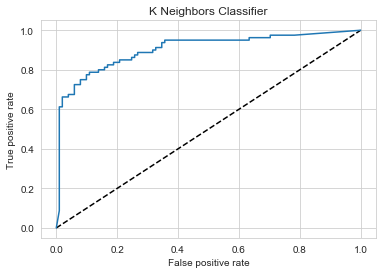

In [92]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='K Nearest Neighbors')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('K Neighbors Classifier')
plt.show()

Observations :-
    
1. As the line is moving towards 1, so we can conclude that we have developed good model.

# Saving the model

In [93]:
import joblib 

In [94]:
joblib.dump(knn,"knn_titanic.obj")

['knn_titanic.obj']